In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

Dataset URL: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images
License(s): ODbL-1.0
 99% 118M/119M [00:01<00:00, 124MB/s] 
100% 119M/119M [00:01<00:00, 100MB/s]


In [8]:
from zipfile import ZipFile
file_name = "chest-ctscan-images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [9]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 23,116,580 (88.18 MB)

 Trainable params: 1,708,676 (6.52 MB)

 Non-trainable params: 21,407,904 (81.66 MB)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test datase

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [27]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=8
)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 128s 6s/step - accuracy: 0.3666 - loss: 1.4680 - val_accuracy: 0.6127 - val_loss: 0.8496
Epoch 2/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.5810 - loss: 0.9007 - val_accuracy: 0.6762 - val_loss: 0.7992
Epoch 3/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.6334 - loss: 0.8111 - val_accuracy: 0.7175 - val_loss: 0.7229
Epoch 4/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.7030 - loss: 0.6906 - val_accuracy: 0.7302 - val_loss: 0.6196
Epoch 5/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 116s 6s/step - accuracy: 0.7872 - loss: 0.4919 - val_accuracy: 0.6921 - val_loss: 1.0403
Epoch 6/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.8237 - loss: 0.4424 - val_accuracy: 0.7397 - val_loss: 0.6312
Epoch 7/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.8608 - loss: 0.3629 - val_accuracy: 0.6889 - val_loss: 0.9063
Epoch 8/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.9078 - loss: 0.2622 - val_accuracy: 0.6095 - val_loss: 1.5266


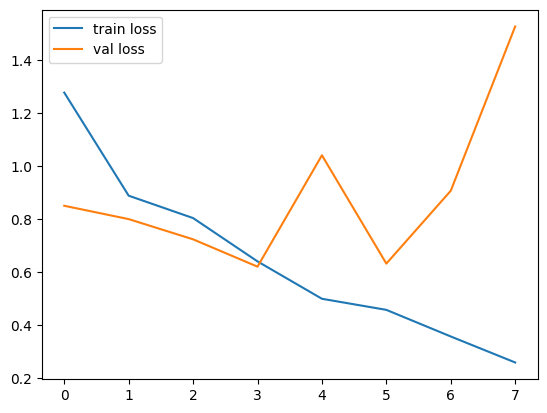

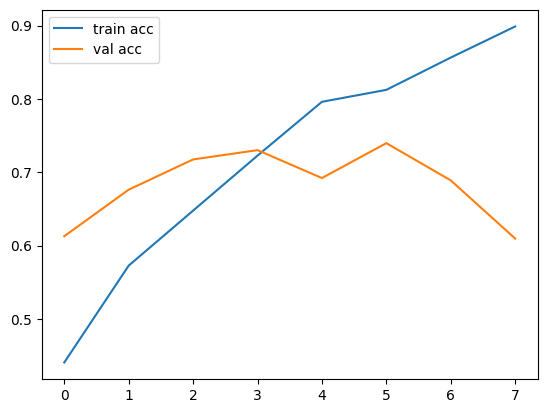

<Figure size 640x480 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
import numpy as np

# Assuming 'model' is your trained model and 'test_set' is your test dataset
y_pred = model.predict(test_set) # Predict on the test set

y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 0
 0 0 0 0 1 0 3 0 0 3 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 3 0 3 0 0 0 1 0 2 0 0 0 2 0 2 0 0 0 0 0 0 3 0 0 0
 0 0 0 0 3 0 0 0 0 2 3 0 0 2 0 0 2 3 0 0 2 2 1 2 0 2 0 0 0 0 0 0 3 2 0 0 0
 0 0 0 2 0 0 0 0 3 0 1 0 0 0 0 2 0 0 2 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 2 2 0 0 0 0 0 2 0 0 2 0 0 2 0 2 0 2 0 0 0 0 0 2 3 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 1 1 0 3 3 0 0 0
 0 0 3 0 0 0 0 0 0 3 2 0 0 2 3 0 2 2 0 0 0 0 0 2 0 0 0 3 0 0 0 0 2 2 3 0 0
 0 2 2 3 2 0 2 2 2 0 0 0 2 0 1 0 2 0 0]
